In [133]:
import pandas as pd
import numpy as np
import os
import cv2

# Replace 'destination_directory' with the path where you want to save the images
destination_directory = 'your_folder_path1'

# Load the dataset into a DataFrame
df = pd.read_csv('train.csv')
y=df["label"]
df = df.drop(columns=["label"])
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
(df)

2

In [33]:
for index, row in df.iterrows():
    # Assuming pixel columns are named 'pixel_1', 'pixel_2', ..., 'pixel_784' (for a 28x28 image)
    pixel_columns = ['pixel' + str(i) for i in range(0, 784)]
    
    # Extract the pixel values from the DataFrame
    pixel_values = row[pixel_columns].values
    
    # Reshape the pixel values into a 28x28 image
    image = pixel_values.reshape(28, 28)
    
    # Create the destination path for the image
    image_name = f'image_{index}.png'  # You can choose any naming convention
    destination_path = os.path.join(destination_directory, image_name)
    
    # Save the image using OpenCV
    cv2.imwrite(destination_path, image)

print("Images saved to", destination_directory)

Images saved to your_folder_path1


In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
X_train=X_train.values
X_test=X_test.values
X_train=X_train.reshape(33600, 28, 28)
X_test=X_test.reshape(8400, 28, 28)
X_test.shape

(8400, 28, 28)

In [141]:
x_train=X_train/255
x_test=X_test/255
x_train.shape

(33600, 28, 28)

In [122]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Flatten
from keras import Sequential

In [123]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [124]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
840/840 [==============================] - 7s 4ms/step - loss: 0.3452 - accuracy: 0.9024 - val_loss: 0.2061 - val_accuracy: 0.9430
Epoch 2/10
840/840 [==============================] - 3s 3ms/step - loss: 0.1645 - accuracy: 0.9521 - val_loss: 0.1471 - val_accuracy: 0.9597
Epoch 3/10
840/840 [==============================] - 3s 4ms/step - loss: 0.1134 - accuracy: 0.9666 - val_loss: 0.1303 - val_accuracy: 0.9631
Epoch 4/10
840/840 [==============================] - 3s 3ms/step - loss: 0.0847 - accuracy: 0.9747 - val_loss: 0.1254 - val_accuracy: 0.9650
Epoch 5/10
840/840 [==============================] - 3s 3ms/step - loss: 0.0651 - accuracy: 0.9819 - val_loss: 0.1123 - val_accuracy: 0.9695
Epoch 6/10
840/840 [==============================] - 3s 4ms/step - loss: 0.0511 - accuracy: 0.9846 - val_loss: 0.1180 - val_accuracy: 0.9682
Epoch 7/10
840/840 [==============================] - 3s 4ms/step - loss: 0.0411 - accuracy: 0.9881 - val_loss: 0.1171 - val_accuracy: 0.9698
Epoch 

In [180]:
x=model.predict(x_test)

263/263 [==============================] - 1s 2ms/step


In [181]:
xt=x.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,xt)

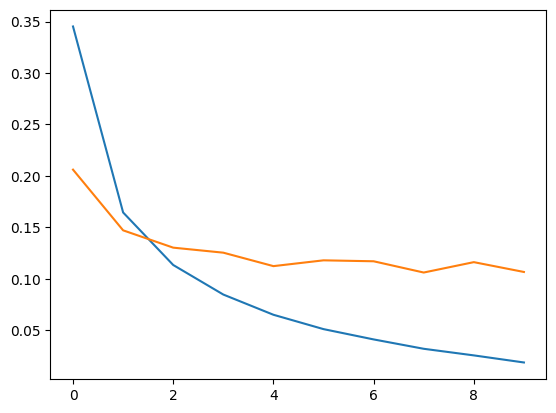

In [146]:
import matplotlib.pylab as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

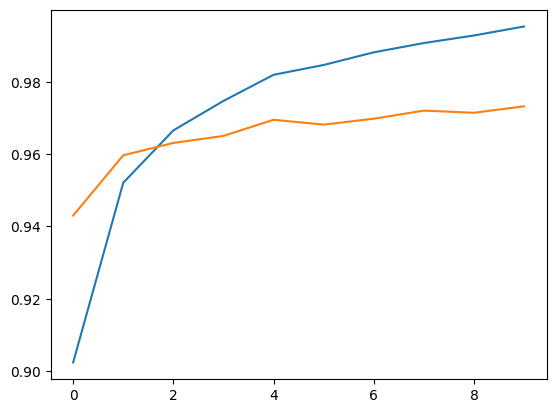

In [147]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [175]:
model.save("minis.h5")

c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
